In [1]:
import os
from PIL import Image                       # package to manipulate and import images   
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch                                # package for deeplearning
from torch import nn
from torch.utils.data import DataLoader     # pytorch dataloader for easily loading minibatches during training
import torchvision                          # package for using images in deeplearning (computer vision)

from dataset import train_dataset, path_dict           # script for creating custom dataset

from preprocess import image_process

from nlp_preprocess import text_process




Using TensorFlow backend.


# Exploring the Data (Images)  
### Convert single image to tensor and plot tensor

In [84]:
image = Image.open('/Users/ianleefmans/Desktop/data/train/part2/part2_images/11/218.jpg') ### image path on local device

In [87]:
image.getpalette # images are CMYK instead of RGB

<bound method Image.getpalette of <PIL.Image.Image image mode=RGB size=707x594 at 0x1A232B8910>>

In [29]:
image.show() # view image

In [86]:
# to convert from CMYK to RGB
if image.mode != 'RGB':
    image = image.convert('RGB')
    
image.show()

In [9]:
transform = torchvision.transforms.ToTensor() # create transform that changes image to tensor

In [22]:
image = transform(image) # transform image to tensor

In [23]:
image.size() # view image-tensor dimensions, there are 3 channels now (RGB) and the image 
             # is 400 pixels by 335 pixels

torch.Size([3, 228, 600])

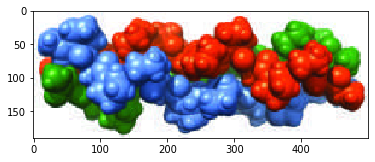

In [110]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(image))   # plot image-tensor 
                                                                    #(note the same as origional image)

# Train Dataset Class   
### Changing images to tensors and create dataloader  
Class has been created created. Here are the outstanding issues:  
      
  1) add option for varying image size (probably not neccessary)  
  2) need to add captions if they can be accessed 
  

#### Below is used for testing:

In [2]:
#CREATE TRAIN DATASET CLASS

# Define arguments for train_dataset class
annotation_path = '/Users/ianleefmans/Desktop/data/train/part1/part1_2.json'
path = '/Users/ianleefmans/Desktop/data/train'
index_dict = path_dict(path)


#annotation = pd.read_json(annotation_path)

#create trainset
train_set = train_dataset(annotation_path, index_dict, img_dir = path, 
                          transform = torchvision.transforms.ToTensor())



In [13]:
annotation.Questions

0        What are positively charged,  thus allowing th...
1                    How are the histone subunits charged?
2        Are the histone subunits positively charged,  ...
3         Where are liver stem cells (oval cells) located?
4        What are stained here with an immunohistochemi...
                               ...                        
32794                                       Where is this?
32795                           What does this image show?
32796    Does this image show polyarteritis nodosa, kid...
32797    Does cytomegaly show polyarteritis nodosa, kid...
32798                                       Where is this?
Name: Questions, Length: 32799, dtype: object

In [28]:
cln_txt = text_process(annotation.Questions)
text = cln_txt.pd_col_to_list()
text

['What are positively charged,  thus allowing the compaction of the negatively charged DNA?',
 'How are the histone subunits charged?',
 'Are the histone subunits positively charged,  thus allowing the compaction of the negatively charged DNA?',
 'Where are liver stem cells (oval cells) located?',
 'What are stained here with an immunohistochemical stain for cytokeratin 7?',
 'What are bile duct cells and canals of Hering stained here with for cytokeratin 7?',
 'Are bile duct cells and canals of Hering stained here with an immunohistochemical stain for cytokeratin 7?',
 'What are illustrated?',
 'Are the principal cellular alterations that characterize reversible cell injury and necrosis illustrated?',
 'Are methylation of particular histone residues illustrated?',
 'What is considered to culminate in necrosis if the injurious stimulus is not removed, by convention?',
 'How is reversible injury considered to do if the injurious stimulus is not removed, by convention?',
 'Is reversible 

In [29]:
text = cln_txt.remove_stopwords(text)
text

[['positively',
  'charged',
  'thus',
  'allowing',
  'compaction',
  'negatively',
  'charged',
  'dna'],
 ['histone', 'subunits', 'charged'],
 ['histone',
  'subunits',
  'positively',
  'charged',
  'thus',
  'allowing',
  'compaction',
  'negatively',
  'charged',
  'dna'],
 ['liver', 'stem', 'cells', 'oval', 'cells', 'located'],
 ['stained', 'immunohistochemical', 'stain', 'cytokeratin', '7'],
 ['bile', 'duct', 'cells', 'canals', 'hering', 'stained', 'cytokeratin', '7'],
 ['bile',
  'duct',
  'cells',
  'canals',
  'hering',
  'stained',
  'immunohistochemical',
  'stain',
  'cytokeratin',
  '7'],
 ['illustrated'],
 ['principal',
  'cellular',
  'alterations',
  'characterize',
  'reversible',
  'cell',
  'injury',
  'necrosis',
  'illustrated'],
 ['methylation', 'particular', 'histone', 'residues', 'illustrated'],
 ['considered',
  'culminate',
  'necrosis',
  'injurious',
  'stimulus',
  'removed',
  'convention'],
 ['reversible',
  'injury',
  'considered',
  'injurious',
  's

In [30]:
text = cln_txt.text_to_vec(text)

In [37]:
text[0].shape

(4700, 4701)

In [40]:
text[0][0].shape

(4701,)

In [3]:
train_set[32794]['image'].size()

/Users/ianleefmans/Desktop/data/train/part2/part2_images/77/3328.jpg


torch.Size([3, 491, 600])

/Users/ianleefmans/Desktop/data/train/part2/part2_images/77/3328.jpg


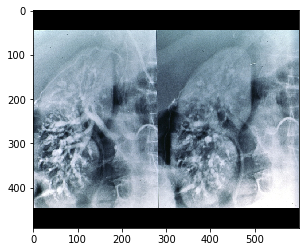

In [4]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(train_set[32794]['image'])) #plot indexed imaged
                                                                                         #from dataset 1716
    
                                                                                    # good test cases 841 , 1716

In [5]:
#define custom collate function
def my_collate(batch):
    data = [item for item in batch]
    #target = [item[1] for item in batch]
    #target = torch.LongTensor(target)
    return data

# create dataloader
trainset = DataLoader(dataset=train_set,
                      batch_size=4,
                      shuffle=True)
                      #collate_fn=my_collate) # use custom collate function here
                      #pin_memory=True)

In [6]:
sample = iter(trainset).next() #iterate to next minibatch from dataloader
print(sample['image'][3].size()) # show size of one picture in the minibatch


/Users/ianleefmans/Desktop/data/train/part2/part2_images/21/731.jpg
/Users/ianleefmans/Desktop/data/train/part2/part2_images/19/602.jpg
/Users/ianleefmans/Desktop/data/train/part2/part2_images/0/34.jpg
/Users/ianleefmans/Desktop/data/train/part2/part2_images/13/344.jpg
torch.Size([3, 491, 600])


In [7]:
sample['image'].size()

torch.Size([4, 3, 491, 600])

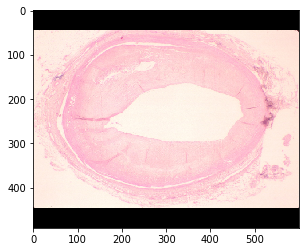

In [8]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(sample['image'][3])) #plot image from minibatch

In [11]:
(109824/128)/33


26.0

In [9]:
from pretrain_VAE import VAE 

In [10]:
y = VAE(16).forward(sample['image'])

1, torch.Size([4, 2, 54912])
2 torch.Size([4, 109824])
3 torch.Size([4, 128, 26, 33])
4 torch.Size([4, 3, 491, 600])


In [10]:
y = VAE(16).forward(sample['image'])

torch.Size([4, 128, 26, 33])
torch.Size([4, 109824])
torch.Size([4, 2, 54912])
torch.Size([4, 54912])


In [15]:
(54912/64)/26

33.0

In [12]:
import torch.nn as nn

In [ ]:
fc = nn.Linear(y.size(1), y.size(1)*2)
z = fc(y)

In [13]:
y = torch.rand([4,54912])

In [14]:
y.size()

torch.Size([4, 54912])

In [15]:
z = y.view(y.size(0), 64, 26, 33)

In [16]:
z.size()

torch.Size([4, 64, 26, 33])

In [17]:
pool = nn.MaxPool2d(kernel_size=2, return_indices = True)

new, idx = pool(z)

new.size()

torch.Size([4, 64, 13, 16])

In [19]:
unpool = nn.MaxUnpool2d(kernel_size=2, idx)

newnew = unpool(new) #output_size = torch.Size([-1, 64, 26, 33])

newnew.size()

SyntaxError: positional argument follows keyword argument (<ipython-input-19-039d3254170f>, line 1)

In [13]:
a = torch.rand(4, 1000)
b = torch.rand(4, 1000)

torch.cat((a,b),1).size()

torch.Size([4, 2000])

# Image Preprocessing Class  
  
  Class has been created. Outstanding issues:  
    
  1) Gather image size information to determine best size to conform to  
       $\textit{*this is a testing issue class does not need to be altered}$

#### Image expansion testing

In [2]:
image = Image.open('/Users/ianleefmans/Desktop/data/train/part2/part2_images/11/218.jpg') 
if image.mode != 'RGB':
    image = image.convert('RGB')
    
image.show()

In [ ]:
preprocess = image_process((avg_height, avg_width))

In [3]:
# largest height: 1310
# largest width: 1544

# smallest height: 84
# smallest width: 60

avg_height = 491
avg_width = 600

image = preprocess.expand(image)
image.show()

In [4]:
image.getpalette

<bound method Image.getpalette of <PIL.Image.Image image mode=RGB size=584x491 at 0x1A292CBE10>>

In [5]:
transform = torchvision.transforms.ToTensor()
image = transform(image)

In [6]:
image2 = preprocess.uniform_size(image)

In [7]:
image2.size()

torch.Size([3, 491, 600])

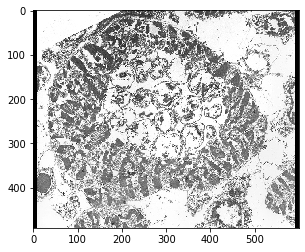

In [8]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(image2))

#### Testing to find largest image dimensions

In [46]:
height = 9999999
width = 9999999
height_tot = 0
width_tot = 0
count = 0
for i in range(820):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.'+str(i)+'.jpg')
        if image.height<height:
            height = image.height
        if image.width<width:
            width = image.width
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
    
for i in range(886):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part1/Images/img_'+str(i)+'.jpg')
        if image.height<height:
            height = image.height
        if image.width<width:
            width = image.width
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
    
path = '/Users/ianleefmans/Desktop/data/train'
index_dict = path_dict(path)
count_h=0
count_w=0
for i in range(3329):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part2/part2_images/'+str(index_dict[i])+ '/'+ str(i)+'.jpg')
        if image.height<height:
            height = image.height
        else:
            count_h+=1
        if image.width<width:
            width = image.width
        else:
            count_w+=1
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
height_avg = height_tot/count
width_avg = width_tot/count


In [47]:
height

84

In [48]:
width

60

In [46]:
count_h

3329

In [47]:
count_w

3329

In [51]:
height_avg

491.0894357743097

In [52]:
width_avg

707.9197679071628

In [53]:
count

4998

In [55]:
(708+491)/2

599.5

In [2]:
import pandas as pd

In [4]:
df = pd.read_json('/Users/nylaennels/Desktop/train/part1/part1_2.json')

In [5]:
df.head()

,Answers,Images,Questions
0,the histone subunits,Fig.1,"What are positively charged, thus allowing th..."
1,positively charged,Fig.1,How are the histone subunits charged?
2,yes,Fig.1,"Are the histone subunits positively charged, ..."
3,in the canals of hering,Fig.3,Where are liver stem cells (oval cells) located?
4,bile duct cells and canals of hering,Fig.3,What are stained here with an immunohistochemi...


In [6]:
len(df)

32799